In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
# loading dataframe
df = pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


****EDA****

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
## cleaning missing values
df.shape

(5110, 12)

In [6]:
df[df.duplicated()] ## no duplicates

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [7]:
#df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

In [8]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
#df['gender'] = df['gender'].replace({'Female': 1, 'Male': 0, 'Other': 2})
# 2 - Other
# 1 - Female
# 0 - Male

In [10]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [12]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [13]:
df.Residence_type.value_counts()
# almost equal number of people from rural and urban areas in the 

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [14]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [15]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [16]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [17]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [18]:
## handling missing data - BMI - by Prediction through decision tree - variables used: age and gneder


from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder



DT_bmi_pipeline = Pipeline(steps = [
    ('scale', StandardScaler()),
    ('lr', DecisionTreeRegressor(random_state = 42))
])


X = df[['age', 'gender', 'bmi']].copy()
X.gender = X.gender.replace({'Male': 0, 'Female': 1, 'Other': -1})

X.gender = X.gender.astype(np.uint8)


In [19]:
## Separting those values that have Missing BMI

# test set would contain all bmi missing 201 values
Missing = X[X.bmi.isna()]

# train set would contain all non-missing bmi values
X_train = X[~X.bmi.isna()]
Y_train = X_train.pop('bmi')

# Fit regressor
DT_bmi_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('lr', DecisionTreeRegressor(random_state=42))])

In [20]:
## Predicting missing BMI and substituting in the original dataset
predicted_bmi = pd.Series(DT_bmi_pipeline.predict(Missing[['age', 'gender']]), index = Missing.index)
predicted_bmi

1       29.879487
8       30.556098
13      27.247222
19      30.841860
27      33.146667
          ...    
5039    32.716000
5048    28.313636
5093    31.459322
5099    28.313636
5105    28.476923
Length: 201, dtype: float64

In [21]:
# substituting in original dataset
df.loc[Missing.index, 'bmi'] = predicted_bmi

In [22]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## PLOTS TO UNDERSTAND CORRELATIONS

In [23]:
df.corr(method = 'pearson')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.001600,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.334774,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.164914,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.043624,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.172528,0.131945
bmi,0.001600,0.334774,0.164914,0.043624,0.172528,1.000000,0.041516
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.041516,1.000000


In [24]:
variables = [variable for variable in df.columns]

conts = ['age','avg_glucose_level','bmi']

In [25]:
variables

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [26]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12), facecolor='#f6f6f6')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)
gs

GridSpec(4, 3)

<Figure size 864x864 with 0 Axes>

In [27]:
corr = df.corr()

In [28]:
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True],
       [False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False,  True]])

<AxesSubplot:>

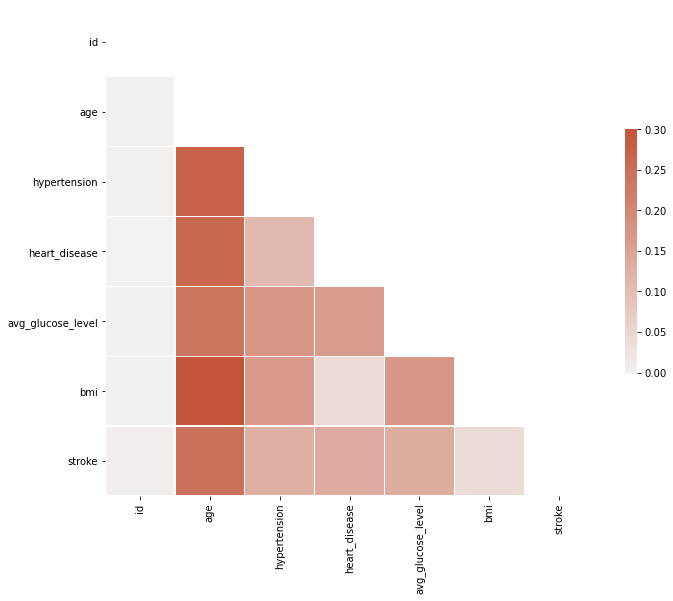

In [29]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

import seaborn as sns
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Age, hypertension, heartdisease, ever_married, avg_glucose_level are the most correlated

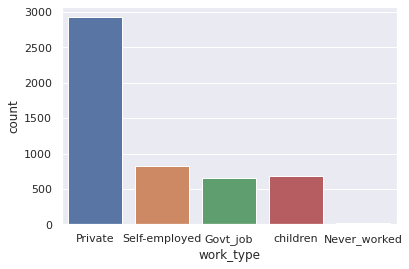

In [30]:
# singular plots


# hypertension
# heart_disease
# ever_married
# gender
# stroke
# smoking


sns.set_theme(style = 'darkgrid')
#plot_hypertension = sns.countplot(data = df, x = 'hypertension')
#plot_heart_disease = sns.countplot(data = df, x = 'heart_disease')
plot = sns.countplot(data = df, x = 'work_type')

<Figure size 504x504 with 0 Axes>

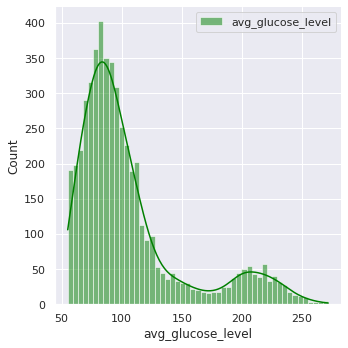

In [31]:
# For Avergae Glucose level
fig = plt.figure(figsize=(7,7))
sns.displot(df.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

<Figure size 720x720 with 0 Axes>

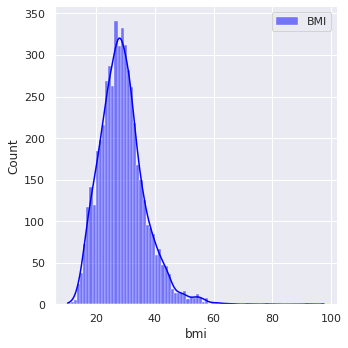

In [32]:
# For BMI distribution
fig = plt.figure(figsize=(10,10))
sns.displot(df.bmi, color = 'blue', label = 'BMI', kde = True)
plt.legend()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


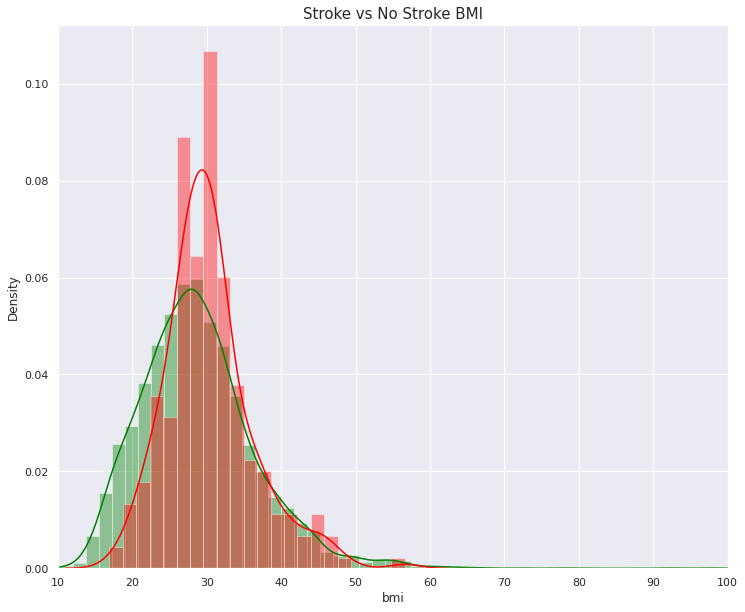

In [33]:
## Stroke vs No Stroke Avergae Glucose Level
plt.figure(figsize=(12,10))

sns.distplot(df[df['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(df[df['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('Stroke vs No Stroke BMI', fontsize = 15)
plt.xlim([10,100])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


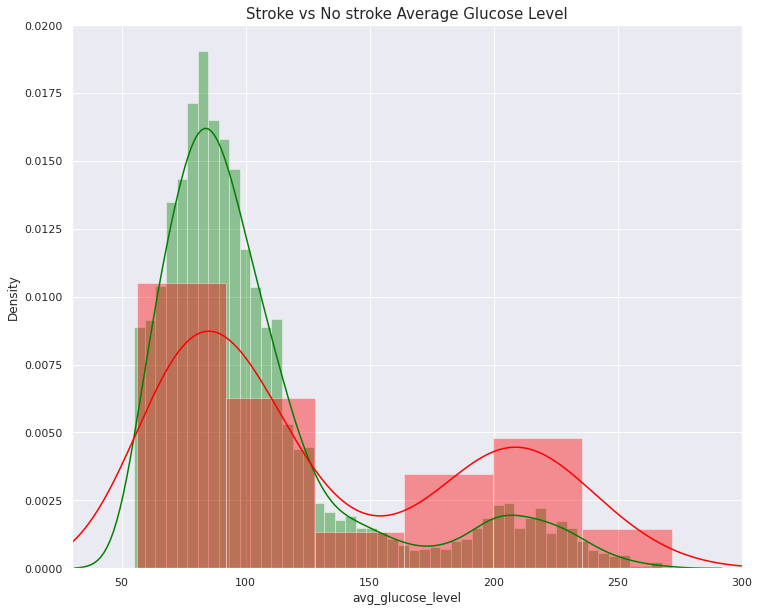

In [34]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke']==0]['avg_glucose_level'], color = 'green')
sns.distplot(df[df['stroke'] == 1]['avg_glucose_level'], color = 'red')
plt.title('Stroke vs No stroke Average Glucose Level', fontsize = 15)
plt.xlim([30,300]) ## limit of x-axis
plt.show()

# Scatter Plot to see 3 variable variation

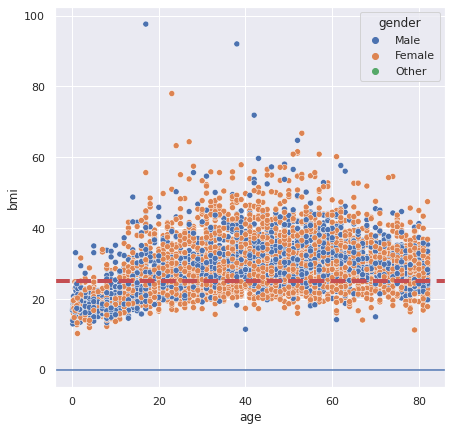

In [35]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data = df, x = "age", y = "bmi", hue = "gender")
## to draw a line within the graph
graph.axhline(y = 25, linewidth = 4, color = "r", linestyle = '--')
graph.axhline()
plt.show()

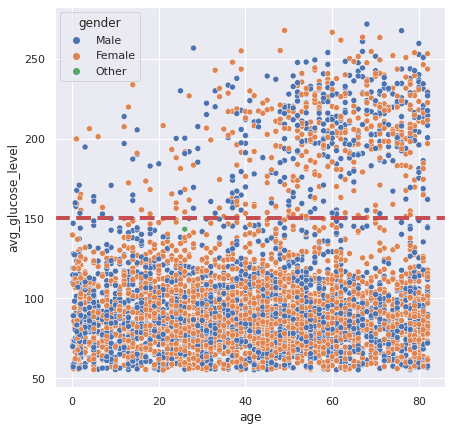

In [36]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data= df, x = "age", y = "avg_glucose_level", hue="gender")
graph.axhline(y = 150, linewidth = 4, color = "r", linestyle = "--")
fig.show()

According to the graph, all people above glucose level 150 and above BMI 25 are considered as having more risk to Stroke

In [37]:
# With respect to smokers and non-smokers
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.879487,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


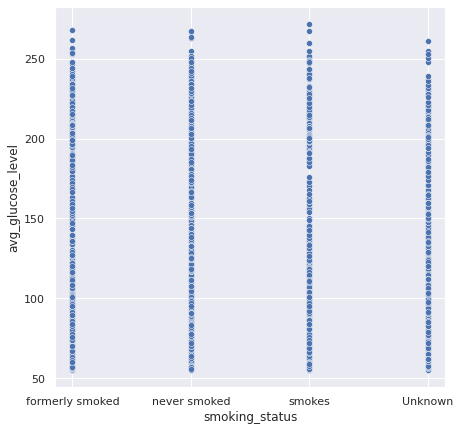

In [38]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data = df, x = "smoking_status", y = "avg_glucose_level")
fig.show()

<Figure size 720x720 with 0 Axes>

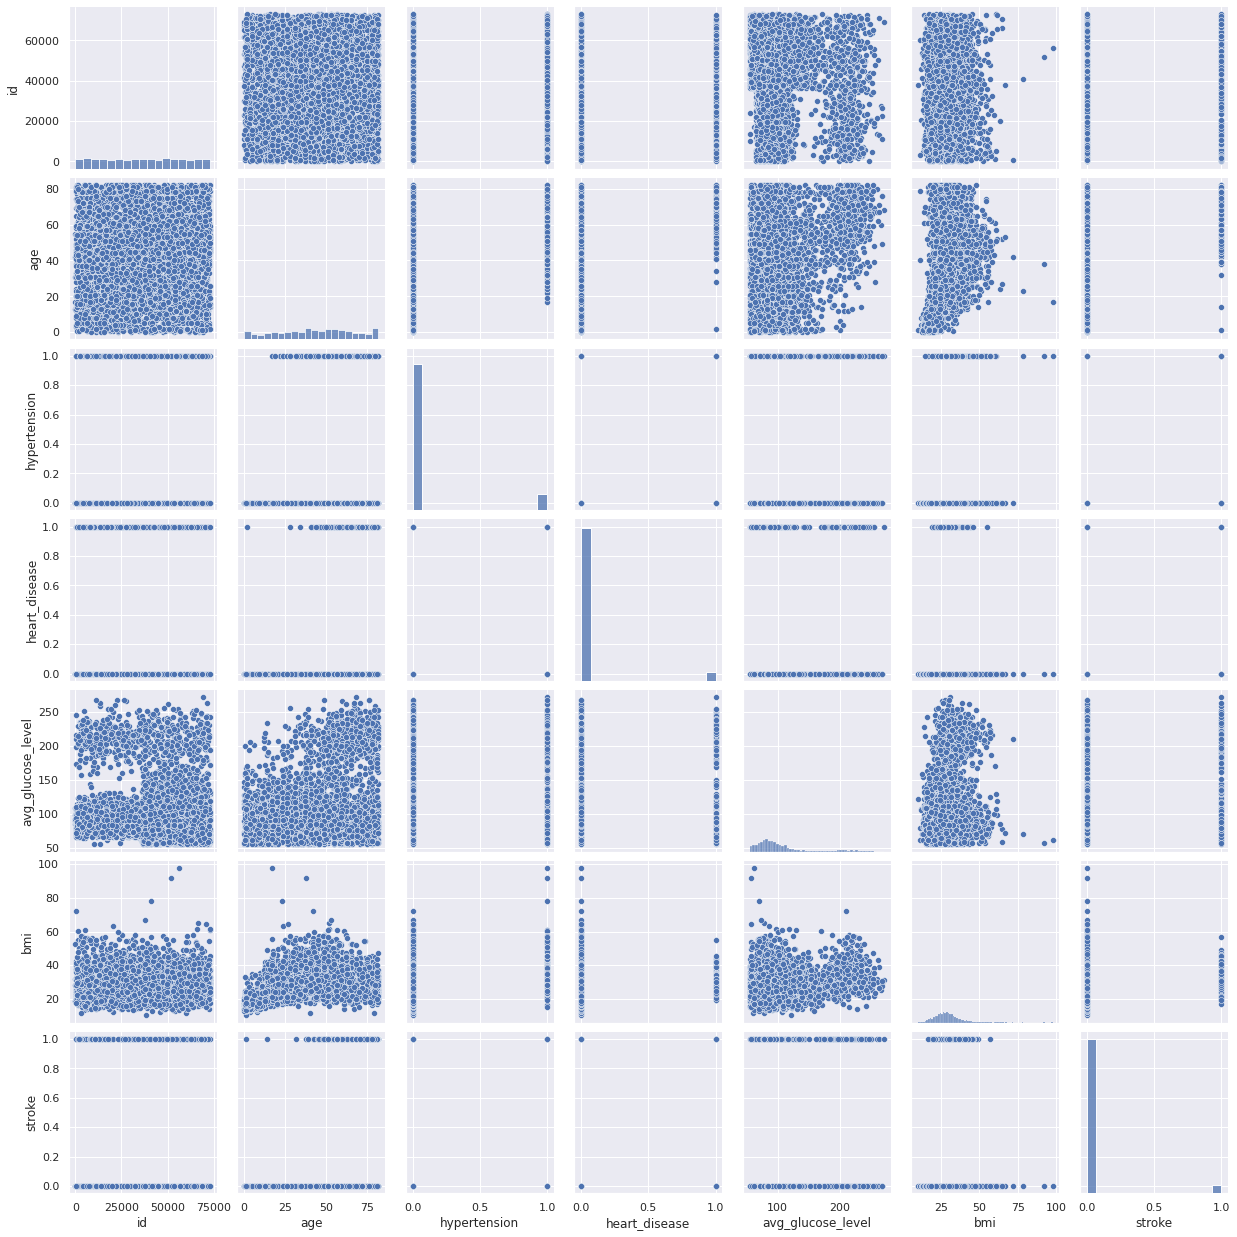

In [39]:
# pair plot - all possible scatter plots
fig = plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

# Data Preprocessing

In [40]:
# Getting predictor and the target variables separate
x = df.iloc[:, 1:-1].values
x

array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       ['Female', 61.0, 0, ..., 202.21, 29.879487179487185,
        'never smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

In [41]:
y = df.iloc[:, -1].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [42]:
## One hot encoding for categorical variables: gender, work_type, smoking_status
## Label encoding of binary variables: ever_married, residence_type

In [43]:
df.rename(columns= {'Residence_type': 'residence_type'}, inplace=True)

In [44]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.879487,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [45]:
df['residence_type'].value_counts()

Urban    2596
Rural    2514
Name: residence_type, dtype: int64

In [46]:
# one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

ct = ColumnTransformer(transformers= [('encoder', ohe, [0])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))
x

array([[0.0, 1.0, 0.0, ..., 228.69, 36.6, 'formerly smoked'],
       [1.0, 0.0, 0.0, ..., 202.21, 29.879487179487185, 'never smoked'],
       [0.0, 1.0, 0.0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       [1.0, 0.0, 0.0, ..., 82.99, 30.6, 'never smoked'],
       [0.0, 1.0, 0.0, ..., 166.29, 25.6, 'formerly smoked'],
       [1.0, 0.0, 0.0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

In [47]:
x = np.delete(x, 2, 1) # deleting the 3rd column so as to delete one gender one hot encoded variable to prevent multicollinearity

In [48]:
x[0][6]

'Private'

In [49]:
# one hot encoding of work_type
ct = ColumnTransformer(transformers = [('encoder', ohe, [6])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))
x

array([[0.0, 0.0, 1.0, ..., 228.69, 36.6, 'formerly smoked'],
       [0.0, 0.0, 0.0, ..., 202.21, 29.879487179487185, 'never smoked'],
       [0.0, 0.0, 1.0, ..., 105.92, 32.5, 'never smoked'],
       ...,
       [0.0, 0.0, 0.0, ..., 82.99, 30.6, 'never smoked'],
       [0.0, 0.0, 1.0, ..., 166.29, 25.6, 'formerly smoked'],
       [1.0, 0.0, 0.0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

In [50]:
print("This should be private: ", x[0][2])
print("This should also be private: ", x[2][2])
print("This should also be private: ", x[3][2])

This should be private:  1.0
This should also be private:  1.0
This should also be private:  1.0


In [51]:
# Where does the work_type end
# 0,1: gender
# 2,3,4,5,6: work_type
x[0][7] # age

67.0

In [52]:
# drop number 6 of work_type
x = np.delete(x, 6, 1)
x[0][6]

67.0

In [53]:
# what is the current index of smoking status
x[0][13]

'formerly smoked'

In [54]:
# One hot encoding of smoking status
ct = ColumnTransformer(transformers = [('encoder', ohe, [13])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))
x

array([[0.0, 1.0, 0.0, ..., 'Urban', 228.69, 36.6],
       [0.0, 0.0, 1.0, ..., 'Rural', 202.21, 29.879487179487185],
       [0.0, 0.0, 1.0, ..., 'Rural', 105.92, 32.5],
       ...,
       [0.0, 0.0, 1.0, ..., 'Rural', 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 'Rural', 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 'Urban', 85.28, 26.2]], dtype=object)

In [55]:
# 0,1 : gender
# 2,3,4,5: work_type
# 6,7,8,9: smoking status
x = np.delete(x, 9, 1)
x.shape

(5110, 16)

# Final Tally:

### 0,1 index are gender
### 2,3,4,5 are work_type
### 6,7,8: smoking status

### Ellimination of one hot encoded variable per predictor is done to avoid Multicollineartity

In [56]:
# Label Encoding
i,j = np.where(x == "Urban")

In [57]:
i # row number

array([   0,    3,    5, ..., 5105, 5106, 5109])

In [58]:
j # Column number

array([13, 13, 13, ..., 13, 13, 13])

In [59]:
#Index 15 is ever_married and index 16 is residence_type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 12] = le.fit_transform(x[:, 12])
x[:, 13] = le.fit_transform(x[:, 13])
x

array([[0.0, 1.0, 0.0, ..., 1, 228.69, 36.6],
       [0.0, 0.0, 1.0, ..., 0, 202.21, 29.879487179487185],
       [0.0, 0.0, 1.0, ..., 0, 105.92, 32.5],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 0, 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 1, 85.28, 26.2]], dtype=object)

In [60]:
print("Shape x: ", x.shape) 
print("Shape y: ", y.shape)

Shape x:  (5110, 16)
Shape y:  (5110,)


In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [62]:
print("Number of records in training set: ", x_train.shape)
print("Shape of training set's labels: ", y_train.shape)
print("Number of records in test set: ", x_test.shape)
print("Shape of test set's labels: ", y_test.shape)

Number of records in training set:  (4088, 16)
Shape of training set's labels:  (4088,)
Number of records in test set:  (1022, 16)
Shape of test set's labels:  (1022,)


## Feature Scaling

##### StandardScaler does normalization (x-x_bar)/std_dev --> converts variables into normal dist. with mean 0 and standard dev = 1

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [64]:
x_test

array([[-6.55645166e-01, -4.59239016e-01, -7.65326968e-01, ...,
         9.80138492e-01,  8.53154763e-01, -3.21664074e-01],
       [ 1.52521524e+00, -4.59239016e-01, -7.65326968e-01, ...,
        -1.02026398e+00, -7.78468796e-04, -1.55485383e+00],
       [-6.55645166e-01, -4.59239016e-01,  1.30663108e+00, ...,
         9.80138492e-01, -5.80737776e-01, -3.85230556e-01],
       ...,
       [ 1.52521524e+00, -4.59239016e-01, -7.65326968e-01, ...,
        -1.02026398e+00, -8.14311033e-01,  9.24238975e-01],
       [-6.55645166e-01,  2.17751533e+00, -7.65326968e-01, ...,
         9.80138492e-01,  2.90299190e+00, -2.13954202e-01],
       [-6.55645166e-01,  2.17751533e+00, -7.65326968e-01, ...,
        -1.02026398e+00, -5.07442576e-01, -1.16074164e+00]])

## Handling Imbalanced Data using SMOTE

In [65]:
print("Shape of training data: {} and {}".format(x_train.shape, y_train.shape))

Shape of training data: (4088, 16) and (4088,)


### SMOTE is Synthetic Minority Oversampling Technique - overcoming the overfitting problem and class imbalance problem by generating synthetic minority records by random over-sampling

In [66]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [67]:
x_train_res.shape

(7786, 16)

In [68]:
print("Shape of training data after synthetic oversampling: {} and {} ".format(x_train_res.shape, y_train_res.shape))

Shape of training data after synthetic oversampling: (7786, 16) and (7786,) 


In [69]:
print("Number of label 1 records before over_sampling: ", sum(y_train == 1))
print("Number of label 0 records before over_sampling: ", sum(y_train == 0))
print("\n")
print("Number of label 1 records before SMOTE: ", sum(y_train_res == 1))
print("Number of label 0 records after SMOTE: ", sum(y_train_res == 0))

Number of label 1 records before over_sampling:  195
Number of label 0 records before over_sampling:  3893


Number of label 1 records before SMOTE:  3893
Number of label 0 records after SMOTE:  3893


In [70]:
x_train_res

array([[-0.65564517,  2.17751533, -0.76532697, ..., -1.02026398,
        -0.86023092,  0.98780546],
       [-0.65564517,  2.17751533, -0.76532697, ..., -1.02026398,
        -0.50170259,  2.48797443],
       [-0.65564517, -0.45923902,  1.30663108, ..., -1.02026398,
        -0.90725464,  0.23772097],
       ...,
       [ 1.52521524, -0.45923902, -0.76532697, ...,  0.98013849,
         1.56169171,  1.07117456],
       [-0.65564517,  0.28195988,  0.72419798, ...,  0.98013849,
         2.64567556,  0.1856366 ],
       [-0.65564517, -0.45923902,  1.30663108, ...,  0.35160888,
         1.97371573,  0.02670271]])

# Testing out Baseline Classification Models before Tuning

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [72]:
# importing all metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve, auc, average_precision_score

from sklearn.model_selection import cross_val_score

In [73]:
models_array = []

## Adding it in an array so that could be made into a dataframe later
models_array.append(['Logistic Regression', LogisticRegression(random_state = 0)])
models_array.append(['K Nearest Neighbours', KNeighborsClassifier()])
models_array.append(['SVM Classifier', SVC(random_state=0)])
models_array.append(['Gaussian Naive Bayes', GaussianNB()])
models_array.append(['Bernoulli Naive Bayes', BernoulliNB()])
models_array.append(['Decision Tree Classifier', DecisionTreeClassifier(random_state = 0)])
models_array.append(['Random Forest', RandomForestClassifier(random_state = 0)])
models_array.append(['XGBoost Classifier', XGBClassifier(eval_metric = 'error',use_label_encoder=False)])

In [74]:
list1= []

for m in range(len(models_array)):
    list2 = []
    model = models_array[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # training accuracies - K-fold cross validation
    accuracies = cross_val_score(estimator = model, X = x_train_res, y = y_train_res, cv = 10)
    
    # Accuracy score of test set
    accuracy = accuracy_score(y_test, y_pred)
    
    # Area Score under Reciever Operating Characteristic Curve
    roc = roc_auc_score(y_test, y_pred) 
    
    # Precision
    precision = precision_score(y_test, y_pred)
    
    # Recall
    recall = recall_score(y_test, y_pred)
    
    # F1-score
    f1 = f1_score(y_test, y_pred)
    
    # Printing the results for every model
    print(models_array[m][0], ":")
    print("Training set mean accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Training set standard deviation: {:.2f} %".format(accuracies.std()*100))
    print("Test set accuracy: {:.2f} %".format(accuracy*100))
    print("Confusion Matrix: ", cm)
    print("Precision: {:.2f} %".format(precision*100))
    print("Recall: {:.2f} %".format(recall*100))
    print("F1 score: {:.2f}".format(f1))
    print("AUROC score: {:.2f}".format(roc))
    print("-----------------------------------------")
    print("\n")
    
    
    ## Adding all scores to a list so that we can form a dataframe later
    list2.append(models_array[m][0])
    list2.append(accuracies.mean()*100)
    list2.append(accuracies.std()*100)
    list2.append(accuracy)
    list2.append(precision)
    list2.append(recall)
    list2.append(f1)
    list2.append(roc)
    
    list1.append(list2) ## now list1 contains all the information of the results of the models - this can be put in a data frame
    
    

Logistic Regression :
Training set mean accuracy: 79.80 %
Training set standard deviation: 1.48 %
Test set accuracy: 77.50 %
Confusion Matrix:  [[754 214]
 [ 16  38]]
Precision: 15.08 %
Recall: 70.37 %
F1 score: 0.25
AUROC score: 0.74
-----------------------------------------


K Nearest Neighbours :
Training set mean accuracy: 90.43 %
Training set standard deviation: 0.88 %
Test set accuracy: 82.49 %
Confusion Matrix:  [[827 141]
 [ 38  16]]
Precision: 10.19 %
Recall: 29.63 %
F1 score: 0.15
AUROC score: 0.58
-----------------------------------------


SVM Classifier :
Training set mean accuracy: 86.71 %
Training set standard deviation: 1.68 %
Test set accuracy: 78.28 %
Confusion Matrix:  [[773 195]
 [ 27  27]]
Precision: 12.16 %
Recall: 50.00 %
F1 score: 0.20
AUROC score: 0.65
-----------------------------------------


Gaussian Naive Bayes :
Training set mean accuracy: 58.21 %
Training set standard deviation: 0.83 %
Test set accuracy: 20.84 %
Confusion Matrix:  [[161 807]
 [  2  52]]

From above results we can see that on training and test set the following models performed well:
1. KNN
2. Decision Tree
3. Random Forest
4. XGBoost


The following performed poorly:
1. SVM
2. Logistics Regression
3. Naive Bayes (both Gausian and Bernoulli)

However, before eliminating any models, we should try to select the best hyperparameter and see the performance of each

In [75]:
## Adding the results in a dataframe
df_results = pd.DataFrame(list1, columns = ['Model','Training Mean Accuracy', 'Training Standard Deviation', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Value'])
df_results.sort_values(by = ['Test Accuracy', 'Training Mean Accuracy', 'AUC Value'], inplace=True, ascending = False)
df_results

,Model,Training Mean Accuracy,Training Standard Deviation,Test Accuracy,Precision,Recall,F1 Score,AUC Value
7,XGBoost Classifier,95.711132,6.175640,0.933464,0.250000,0.129630,0.170732,0.553968
6,Random Forest,94.567222,1.635043,0.895303,0.115942,0.148148,0.130081,0.542566
5,Decision Tree Classifier,91.009649,3.090835,0.883562,0.117647,0.185185,0.143885,0.553853
1,K Nearest Neighbours,90.431359,0.879298,0.824853,0.101911,0.296296,0.151659,0.575318
2,SVM Classifier,86.706773,1.677495,0.782779,0.121622,0.500000,0.195652,0.649277
0,Logistic Regression,79.797067,1.479761,0.774951,0.150794,0.703704,0.248366,0.741315
4,Bernoulli Naive Bayes,72.257937,1.250727,0.593933,0.099778,0.833333,0.178218,0.706956
3,Gaussian Naive Bayes,58.206784,0.829397,0.208415,0.060536,0.962963,0.113910,0.564643


# Tuning Models

In [76]:
# Grid search to select hyper-parameters 
from sklearn.model_selection import GridSearchCV

#### Hyperparameter C is used to prevent overfitting and provide regularization strength:
#### For more depth, I refered to this stackoverflow link: https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul


#### var_smoothing in Gaussian Naive Bayes artificially adds a user-defined standard deviation on how many samples to be included near or away from the mean in a gaussian distribution. Link: https://stackoverflow.com/questions/58046129/can-someone-give-a-good-math-stats-explanation-as-to-what-the-parameter-var-smoo


#### cv in grid search means the number of cross validation we have for each set of hyperparameters


In [77]:
grid_models = [
    (LogisticRegression(), [{'C':[0.25, 0.5, 0.75, 1], 'random_state':[0]}]),
    #(KNeighborsClassifier(), [{'n_neighbors': [5,7,8,10], 'metric': ['euclidian', 'manhattan', 'chebyshev', 'minkowski']}]),
    (SVC(), [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear', 'rbf'], 'random_state':[0]}]),
    (GaussianNB(), [{'var_smoothing': [1e-09]}]),
    (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]),
    (DecisionTreeClassifier(), [{'criterion': ['gini', 'entropy'], 'random_state': [0]}]),
    (RandomForestClassifier(), [{'n_estimators': [100, 150, 200], 'criterion': ['gini', 'entropy'], 'random_state': [0]}]),
    (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error'], 'use_label_encoder': [False]}])
]

In [78]:
for i,j in grid_models:
    grid = GridSearchCV(estimator = i, param_grid = j, scoring = 'accuracy', cv = 10)
    grid.fit(x_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    
    print("{}: ", i)
    print("Best Accuracy:  {:.2f} %".format(best_accuracy*100))
    print("Best parameters selected: ", best_param)
    print("------------------------------")
    print("\n")
    

{}:  LogisticRegression()
Best Accuracy:  79.82 %
Best parameters selected:  {'C': 0.25, 'random_state': 0}
------------------------------


{}:  SVC()
Best Accuracy:  86.71 %
Best parameters selected:  {'C': 1, 'kernel': 'rbf', 'random_state': 0}
------------------------------


{}:  GaussianNB()
Best Accuracy:  58.21 %
Best parameters selected:  {'var_smoothing': 1e-09}
------------------------------


{}:  BernoulliNB()
Best Accuracy:  72.26 %
Best parameters selected:  {'alpha': 0.25}
------------------------------


{}:  DecisionTreeClassifier()
Best Accuracy:  92.72 %
Best parameters selected:  {'criterion': 'entropy', 'random_state': 0}
------------------------------


{}:  RandomForestClassifier()
Best Accuracy:  94.79 %
Best parameters selected:  {'criterion': 'entropy', 'n_estimators': 150, 'random_state': 0}
------------------------------


{}:  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, ga

# Random Forest and XGBoost after hyperparmarater tuning

## Random Forest

In [79]:
# Fitting the random forest model with the above hyper parameters obtained by grid search

classifier = RandomForestClassifier(criterion = 'entropy', n_estimators = 150, random_state = 0)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1] #probability with which the prediction is made
cm = confusion_matrix(y_test, y_pred)

print("predicted y: ", y_pred)

predicted y:  [0 0 0 ... 0 0 0]


In [80]:
cm

array([[907,  61],
       [ 48,   6]])

In [81]:
rf_results_df = pd.DataFrame({'Predicted Stroke': y_pred, 
                             'Predicted Stroke Probability': y_prob,
                             'Actual Stroke': y_test})
rf_results_df.head()

,Predicted Stroke,Predicted Stroke Probability,Actual Stroke
0,0,0.48,1
1,0,0.00,0
2,0,0.18,0
3,0,0.00,0
4,0,0.00,0


In [82]:
print(classification_report(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, y_prob))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       968
           1       0.09      0.11      0.10        54

    accuracy                           0.89      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.90      0.89      0.90      1022

ROC AUC Score:  0.7522000306091214
Test Accuracy:  0.8933463796477495


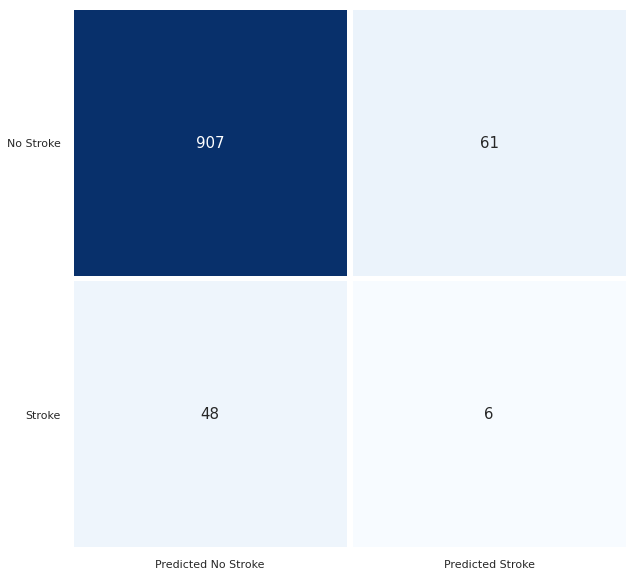

In [83]:
# Visualizing Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt='d', linewidths = 5, cbar = False,
           annot_kws = {'fontsize': 15}, yticklabels= ['No Stroke', 'Stroke'], 
           xticklabels= ['Predicted No Stroke', 'Predicted Stroke'])
plt.yticks(rotation = 0)
plt.show()

In [84]:
# Visualizing the ROC-AUC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc_score = auc(false_positive_rate, true_positive_rate)
roc1 = roc_auc_score
print("AUC of tuned RF is: ", roc_auc_score)

AUC of tuned RF is:  0.7522000306091214


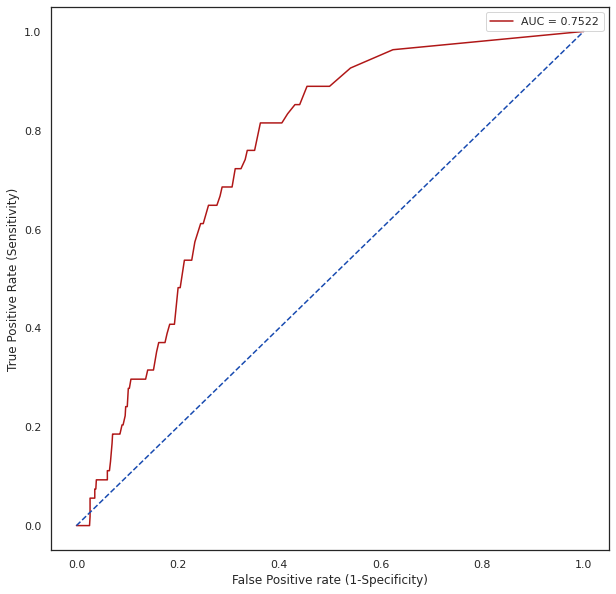

In [85]:
# Visualizing the ROC curve

sns.set_theme(style = 'white')
plt.figure(figsize = (10,10))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label = 'AUC = %0.4f' %roc_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], linestyle='--', color = '#174ab0')
plt.axis('tight') # to remove additional white space in the plot
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive rate (1-Specificity)')
plt.legend()
plt.show()

## XG Boost with tuning

In [86]:
classifier = XGBClassifier(eval_metric = 'error', use_label_encoder = False, learning_rate = 0.1)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

In [87]:
# Putting the results in a dataframe
df_xgboost_results = pd.DataFrame({'Predicted Stroke Variable': y_pred, 
                                  'Predicted Stroke Probability': y_prob,
                                  'Actual Stroke Variable': y_test})
df_xgboost_results.head()

,Predicted Stroke Variable,Predicted Stroke Probability,Actual Stroke Variable
0,0,0.319278,1
1,0,0.000338,0
2,0,0.346752,0
3,0,0.000946,0
4,0,0.000229,0


In [88]:
cm

array([[884,  84],
       [ 44,  10]])

In [89]:
accuracy_score(y_test, y_pred)

0.8747553816046967

In [90]:
# ROC AUC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc_score = auc(false_positive_rate, true_positive_rate)
roc_auc_score

0.738885062748699

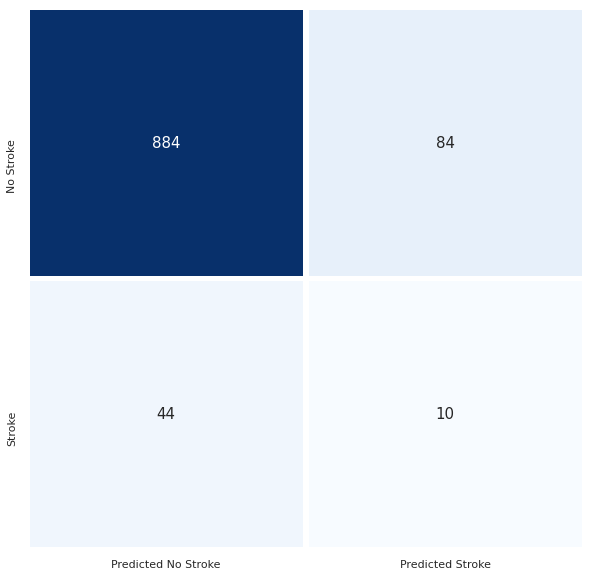

In [91]:
## Visualization - Confusion Matrix
plt.figure(figsize = (10,10))
sns.heatmap(cm, cmap = "Blues", annot = True, fmt = 'd', linewidth = 5, cbar = False, annot_kws = {'fontsize': 15},
           xticklabels = ['Predicted No Stroke', 'Predicted Stroke'], yticklabels = ['No Stroke', 'Stroke'])
plt.show()

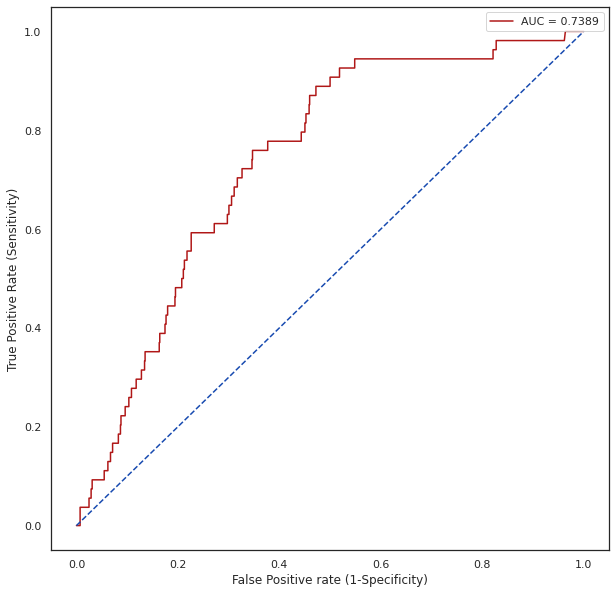

In [92]:
## Visualizaton - ROC AUC Curve

sns.set_theme(style = 'white')
plt.figure(figsize = (10,10))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label = 'AUC = %0.4f' %roc_auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], linestyle='--', color = '#174ab0')
plt.axis('tight') # to remove additional white space in the plot
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive rate (1-Specificity)')
plt.legend()
plt.show()

# Keras ANN

In [93]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.regularizers import l2

In [94]:
# Building the ANN with 3 dense layers
import tensorflow as tf

def ann_classifier():
    ann = tf.keras.models.Sequential() ## Sequential layer has one input tensor and one output tensor
    
    # Dense layer 1
    ann.add(tf.keras.layers.Dense(units=8, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01), activation = 'relu'))
    
    #Dense layer 2
    ann.add(tf.keras.layers.Dense(units=8, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01), activation = 'relu'))
    
    # Dense layer 3
    ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))
    
    
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return ann

In [95]:
model = KerasClassifier(build_fn = ann_classifier, batch_size = 32, epochs = 50)

In [96]:
## Evaluating the basic untuned ANN
accuracies = cross_val_score(estimator = model, X=x_train_res, y=y_train_res, cv = 5)

Epoch 1/50
195/195 [==============================] - 1s 1ms/step - loss: 0.8729 - accuracy: 0.5417
Epoch 2/50
195/195 [==============================] - 0s 1ms/step - loss: 0.6421 - accuracy: 0.7597
Epoch 3/50
195/195 [==============================] - 0s 1ms/step - loss: 0.5289 - accuracy: 0.8245
Epoch 4/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.8236
Epoch 5/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.8338
Epoch 6/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8388
Epoch 7/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.8440
Epoch 8/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.8343
Epoch 9/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.8378
Epoch 10/50
195/195 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.8442

In [97]:
## Checking the meand and std dev of the accuracies obtained
mean = accuracies.mean()
mean

0.7819245219230652

In [98]:
std_dev = accuracies.std()
std_dev

0.056022338813809774

## Tuning ANN using GridSearch

In [99]:
def ann_classifier(optimizer = 'adam'):
    ann = tf.keras.models.Sequential() ## Sequential layer has one input tensor and one output tensor
    
    # Dense layer 1
    ann.add(tf.keras.layers.Dense(units=8, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01), activation = 'relu'))
    
    #Dense layer 2
    ann.add(tf.keras.layers.Dense(units=8, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01), activation = 'relu'))
    
    # Adding dropout which is a technique to randomly ignore neurons while training to reduce overfitting
    tf.keras.layers.Dropout(0.6)
     
    # Dense layer 3
    ann.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))
    
    
    ann.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return ann

In [100]:
model = KerasClassifier(build_fn = ann_classifier, batch_size = 32, epochs = 50)

parameters = {
    'batch_size': [25, 32],
    'epochs': [50,100,150],
    'optimizer': ['adam', 'rmsprop']
}


grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 5, n_jobs = -1)
grid_search.fit(x_train_res, y_train_res)

Epoch 1/150
244/244 [==============================] - 1s 1ms/step - loss: 0.8552 - accuracy: 0.5249
Epoch 2/150
244/244 [==============================] - 0s 1ms/step - loss: 0.7040 - accuracy: 0.7256
Epoch 3/150
244/244 [==============================] - 0s 1ms/step - loss: 0.5675 - accuracy: 0.7893
Epoch 4/150
244/244 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7958
Epoch 5/150
244/244 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.8018
Epoch 6/150
244/244 [==============================] - 0s 1ms/step - loss: 0.4798 - accuracy: 0.7975
Epoch 7/150
244/244 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.7938
Epoch 8/150
244/244 [==============================] - 0s 1ms/step - loss: 0.4613 - accuracy: 0.8097
Epoch 9/150
244/244 [==============================] - 0s 1ms/step - loss: 0.4577 - accuracy: 0.8119
Epoch 10/150
244/244 [==============================] - 0s 1ms/step - loss: 0.4497 - accura

GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff8ec40fb10>,
             n_jobs=-1,
             param_grid={'batch_size': [25, 32], 'epochs': [50, 100, 150],
                         'optimizer': ['adam', 'rmsprop']},
             scoring='accuracy')

In [101]:
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters: ", best_params)

Best Accuracy: 80.45 %
Best Parameters:  {'batch_size': 32, 'epochs': 150, 'optimizer': 'adam'}



# Final Tuned ANN Model

In [102]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 32, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01), activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 32, kernel_regularizer = l2(0.01), bias_regularizer = l2(0.01), activation = 'relu'))
tf.keras.layers.Dropout(0.6)
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

model = ann.fit(x_train_res, y_train_res, batch_size = 25, epochs = 150, validation_split = 0.2)

Epoch 1/150
250/250 [==============================] - 2s 4ms/step - loss: 0.9998 - accuracy: 0.6655 - val_loss: 0.7262 - val_accuracy: 0.8030
Epoch 2/150
250/250 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.7986 - val_loss: 0.7184 - val_accuracy: 0.7439
Epoch 3/150
250/250 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.8158 - val_loss: 0.5960 - val_accuracy: 0.8100
Epoch 4/150
250/250 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.8028 - val_loss: 0.5780 - val_accuracy: 0.8171
Epoch 5/150
250/250 [==============================] - 0s 2ms/step - loss: 0.4546 - accuracy: 0.8174 - val_loss: 0.6504 - val_accuracy: 0.7349
Epoch 6/150
250/250 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.8152 - val_loss: 0.5534 - val_accuracy: 0.8222
Epoch 7/150
250/250 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8190 - val_loss: 0.5620 - val_accuracy: 0.8100

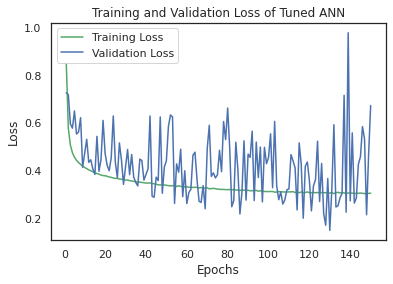

In [103]:
# Loss Graph
# Here model is actually just the ann history


loss_training = model.history['loss']
loss_validation = model.history['val_loss']
epochs = range(1,151)

plt.plot(epochs, loss_training, 'g', label = 'Training Loss')
plt.plot(epochs, loss_validation, 'b', label = 'Validation Loss')

plt.title('Training and Validation Loss of Tuned ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

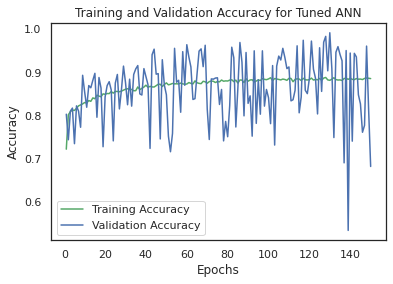

In [104]:
# Training and Validation accuracy plot
training_accuracy = model.history['accuracy']
validation_accuracy = model.history['val_accuracy']
epochs = range(1,151)

plt.plot(epochs, training_accuracy, 'g', label= 'Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy for Tuned ANN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [105]:
y_pred = ann.predict(x_test)

In [106]:
def threshold_prediction(y_pred):
    y_pred_result = []
    for i in y_pred:
        if i > 0.5:
            y_pred_result.append(1)
        else:
            y_pred_result.append(0)
    return y_pred_result
            
y_pred_result = threshold_prediction(y_pred)

In [107]:
cm = confusion_matrix(y_test, y_pred_result)
cm

array([[921,  47],
       [ 45,   9]])

In [108]:
accuracy_test = accuracy_score(y_test, y_pred_result)
accuracy_test

0.9099804305283757

In [109]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_score = auc(false_positive_rate, true_positive_rate)
roc1 = roc_auc_score
print("AUC of tuned ANN is: ", roc_auc_score)

AUC of tuned ANN is:  0.7419077134986225


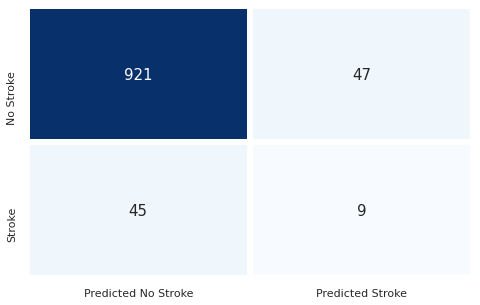

In [110]:
plt.figure(figsize=(8,5))
sns.heatmap(cm, cmap = "Blues", annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws ={'fontsize': 15}, yticklabels = ['No Stroke', 'Stroke'], xticklabels = ['Predicted No Stroke', 'Predicted Stroke'])
plt.show()

# Summary of Results

Clearly the 3 good performing models for Stroke Prediction are as follows:
1. Random Forest: accuracy: 0.89 , auc: 0.75
2. XG Boost: accuracy: 0.87 , auc: 0.74
3. ANN: accuracy: 0.85 , auc: 0.73

So a tuned Random Forest performed best for this data